# Use Case : Diabetes prediction  using Machine Learning - KNN Model



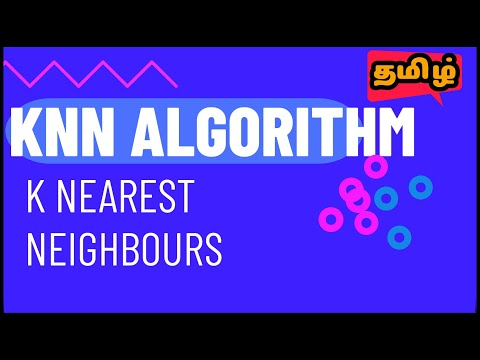

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('SIzXONTnqp4', width=400, height=200)

In [2]:
# import the libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

# Section 1 : Load Dataset and perform EDA

In [3]:
diabetes_df=pd.read_csv("diabetes.csv")

In [4]:
type(diabetes_df)

pandas.core.frame.DataFrame

In [5]:
diabetes_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [6]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
diabetes_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
diabetes_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [10]:
diabetes_df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI']]=diabetes_df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI']].replace(0,np.NaN)

In [11]:
diabetes_df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [12]:
diabetes_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


# Section 2 : Visualization 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017FCD9855C8>,
      dtype=object)

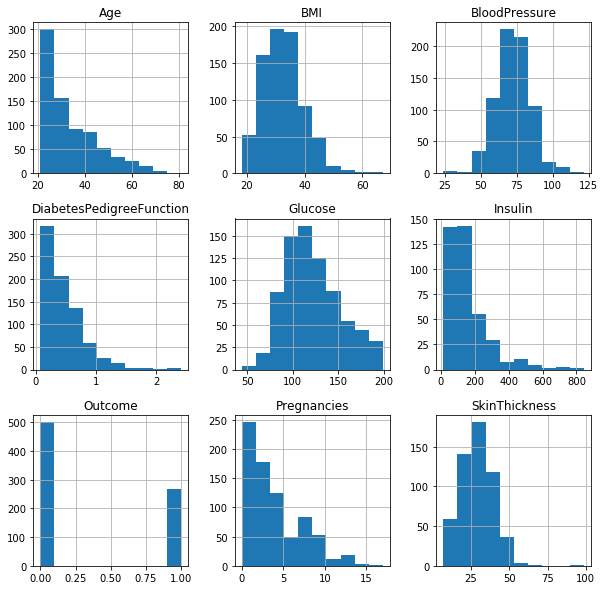

In [13]:
diabetes_df.hist(figsize=(10,10))

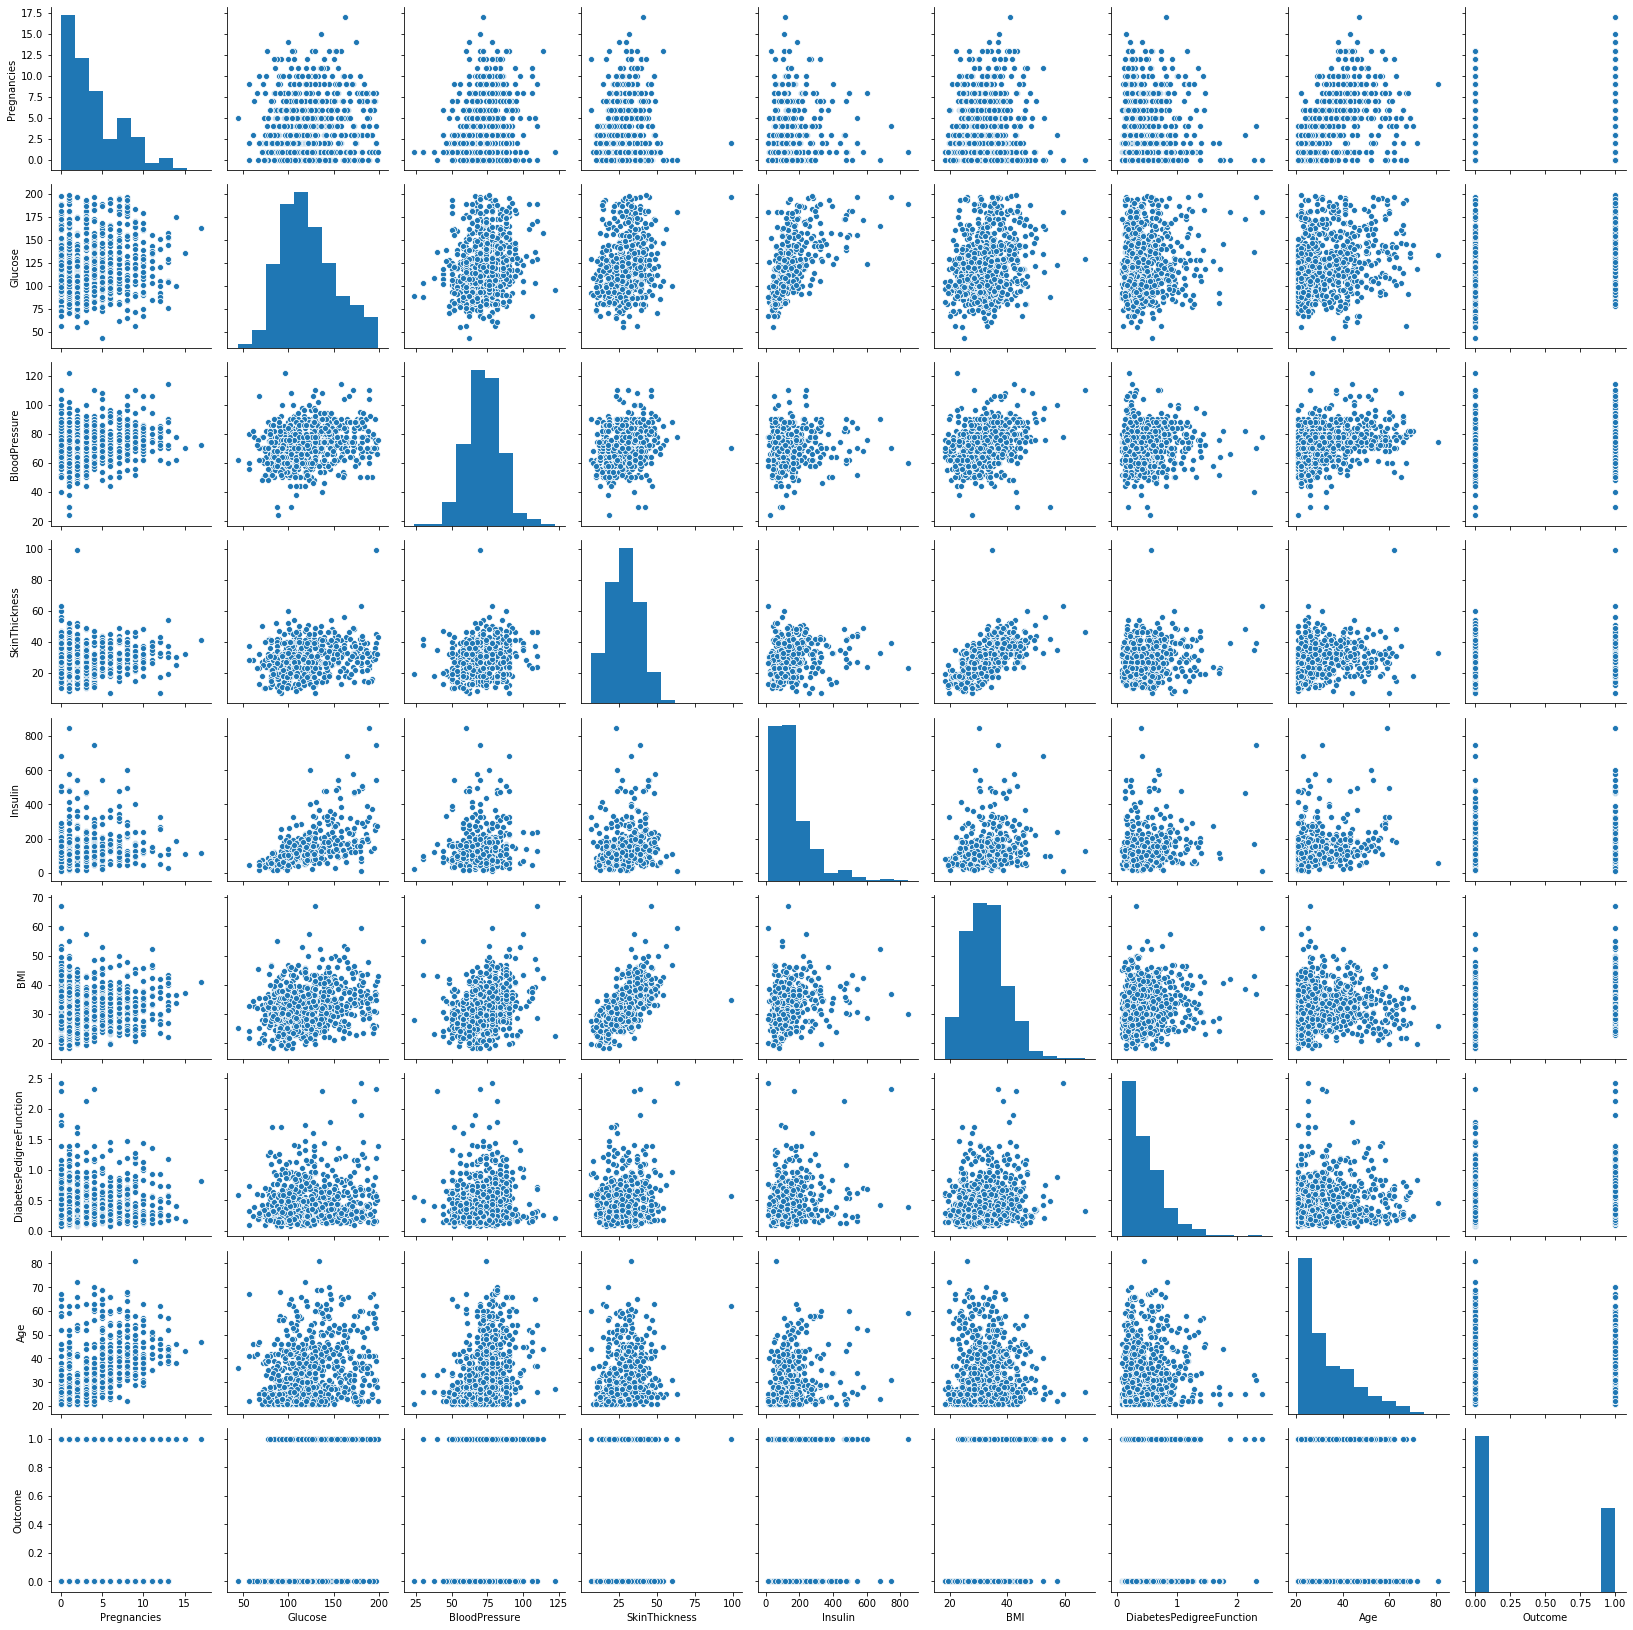

In [14]:
sns.pairplot(diabetes_df)

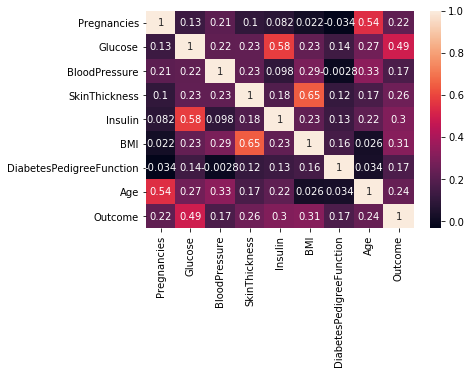

In [15]:
sns.heatmap(diabetes_df.corr(),annot=True)

# Section 3 : Split Dataset & Apply Data Imputation and Feature Scaling




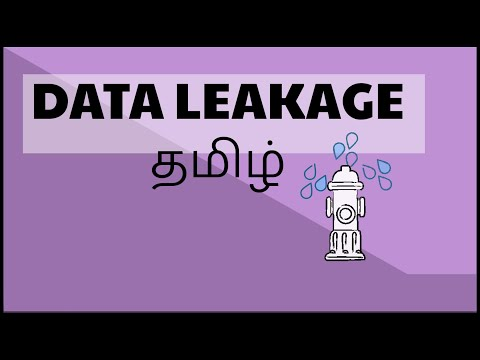

In [16]:

from IPython.display import YouTubeVideo

YouTubeVideo('IWvKU-A4tqo', width=400, height=200)



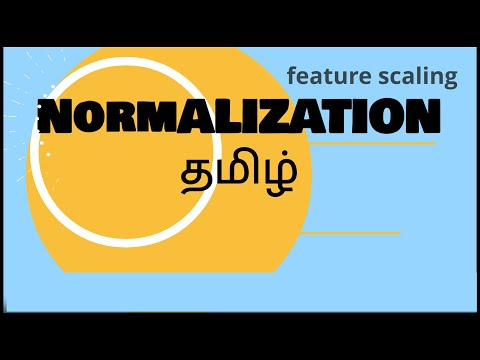

In [17]:
YouTubeVideo('zMw70AvoeiY', width=400, height=200)

In [18]:
from sklearn.model_selection import train_test_split


In [19]:
diabetes_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [20]:
X=diabetes_df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47


In [21]:
y=diabetes_df["Outcome"]
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [23]:
X_train.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                24
SkinThickness               176
Insulin                     290
BMI                           7
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

In [24]:
X_test.isnull().sum()

Pregnancies                  0
Glucose                      0
BloodPressure               11
SkinThickness               51
Insulin                     84
BMI                          4
DiabetesPedigreeFunction     0
Age                          0
dtype: int64

# Data imputation 

# median or mean 


* Example 1:
1,2,3,5,5

mean = 16/5 =3.2

median = 3

mode =5

* Example 2:
1,2,3,5,15

mean = 26/5 =5.2

median = 3

mode =1,2,5,15


Mean is affected by oultiers

Median is not much affected by ourliers 

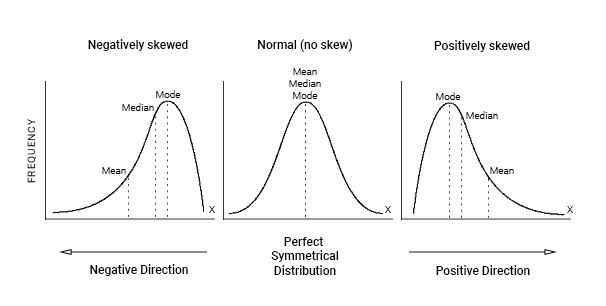

In [25]:
# Glucose ,BloodPressure  -  
# "SkinThickness","Insulin","BMI" -  

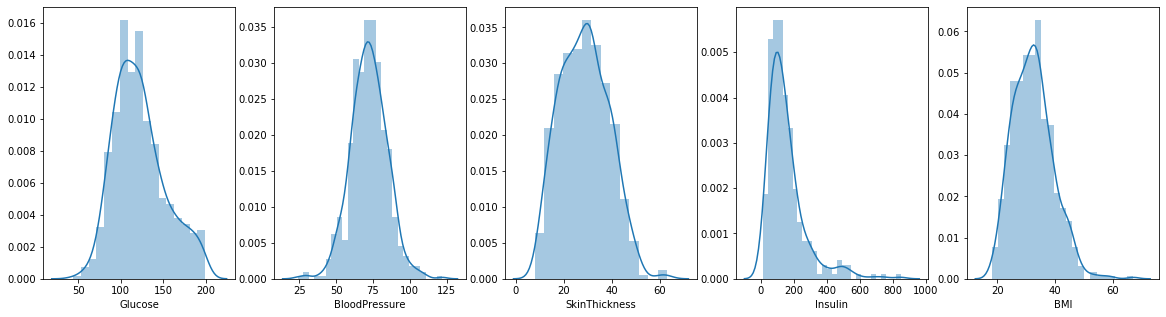

In [26]:
columns_with_nan=["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]

fig,ax=plt.subplots(nrows=1,ncols=5,figsize=(20,5))
for i in range(len(columns_with_nan)) : #range(5) = 0,1,2,3,4
    sns.distplot(X_train[columns_with_nan[i]],ax=ax[i])

data- train,test

Xtrain 

    1.find mean for Glucose ,BloodPressure  
    
    2. find median for "SkinThickness","Insulin","BMI"
    
    3. Replace nan value using fillna function 

Xtest 

    1.Use the mean caluated in Xtrain do not calcualte mean,medai again with xtest data 

    2.Replace nan value using fillna function 

In [27]:
Glucose_mean_xtrain=X_train.loc[:,"Glucose"].mean()
BloodPressure_mean_xtrain=X_train.loc[:,"BloodPressure"].mean()

In [28]:
SkinThickness_median_xtrain=X_train.loc[:,"SkinThickness"].median()
Insulin_median_xtrain=X_train.loc[:,"Insulin"].median()
BMI_median_xtrain=X_train.loc[:,"BMI"].median()

In [ ]:
X_train.loc[:,"Glucose"]=X_train.loc[:,"Glucose"].fillna(Glucose_mean_xtrain)
X_train.loc[:,"BloodPressure"]=X_train.loc[:,"BloodPressure"].fillna(BloodPressure_mean_xtrain)
X_train.loc[:,"SkinThickness"]=X_train.loc[:,"SkinThickness"].fillna(SkinThickness_median_xtrain)
X_train.loc[:,"Insulin"]=X_train.loc[:,"Insulin"].fillna(Insulin_median_xtrain)
X_train.loc[:,"BMI"]=X_train.loc[:,"BMI"].fillna(BMI_median_xtrain)

In [30]:
X_train.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

In [31]:
X_test.loc[:,"Glucose"]=X_test.loc[:,"Glucose"].fillna(Glucose_mean_xtrain)
X_test.loc[:,"BloodPressure"]=X_test.loc[:,"BloodPressure"].fillna(BloodPressure_mean_xtrain)
X_test.loc[:,"SkinThickness"]=X_test.loc[:,"SkinThickness"].fillna(SkinThickness_median_xtrain)
X_test.loc[:,"Insulin"]=X_test.loc[:,"Insulin"].fillna(Insulin_median_xtrain)
X_test.loc[:,"BMI"]=X_test.loc[:,"BMI"].fillna(BMI_median_xtrain)

In [32]:
X_test.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

In [33]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,2,84.0,72.238983,28.5,120.0,32.0,0.304,21
618,9,112.0,82.000000,24.0,120.0,28.2,1.282,50
346,1,139.0,46.000000,19.0,83.0,28.7,0.654,22
294,0,161.0,50.000000,28.5,120.0,21.9,0.254,65
231,6,134.0,80.000000,37.0,370.0,46.2,0.238,46
...,...,...,...,...,...,...,...,...
71,5,139.0,64.000000,35.0,140.0,28.6,0.411,26
106,1,96.0,122.000000,28.5,120.0,22.4,0.207,27
270,10,101.0,86.000000,37.0,120.0,45.6,1.136,38
435,0,141.0,72.238983,28.5,120.0,42.4,0.205,29


# Normalization or Min-Max scaling 

- the data is scaled to a fixed range - usually 0 to 1.
- $ X_{norm} = \frac{X - X_{min}}{X_{max}-X_{min}} $

1. Get min,max value of the respective feature from Xtrain 
2.apply normlaization in xtrain features using fit_transform
3.apply normlaization in xtest features using transform (do not calculate min, max of the respective feature from Xtest)

In [34]:
from sklearn.preprocessing import MinMaxScaler 
min_max_scaler=MinMaxScaler()


In [35]:
X_train=min_max_scaler.fit_transform(X_train)


In [36]:
X_train

array([[0.11764706, 0.25806452, 0.49223452, ..., 0.28220859, 0.09649872,
        0.        ],
       [0.52941176, 0.43870968, 0.59183673, ..., 0.20449898, 0.51409052,
        0.48333333],
       [0.05882353, 0.61290323, 0.2244898 , ..., 0.21472393, 0.24594364,
        0.01666667],
       ...,
       [0.58823529, 0.36774194, 0.63265306, ..., 0.5603272 , 0.45175064,
        0.28333333],
       [0.        , 0.62580645, 0.49223452, ..., 0.49488753, 0.05422716,
        0.13333333],
       [0.        , 0.52258065, 0.73469388, ..., 0.08793456, 0.07856533,
        0.        ]])

In [37]:
X_test=min_max_scaler.transform(X_test)

In [38]:
X_test

array([[0.35294118, 0.3483871 , 0.34693878, ..., 0.32310838, 0.15029889,
        0.36666667],
       [0.11764706, 0.43870968, 0.52040816, ..., 0.35787321, 0.02988898,
        0.        ],
       [0.11764706, 0.41290323, 0.40816327, ..., 0.25766871, 0.03415884,
        0.        ],
       ...,
       [0.47058824, 0.32903226, 0.48979592, ..., 0.3803681 , 0.17378309,
        0.6       ],
       [0.11764706, 0.65806452, 0.46938776, ..., 0.200409  , 0.11058924,
        0.13333333],
       [0.47058824, 0.19354839, 0.46938776, ..., 0.34969325, 0.2677199 ,
        0.3       ]])

# Section 4 : Model Building 

In [39]:
from sklearn.neighbors import KNeighborsClassifier 

In [40]:
knn_model=KNeighborsClassifier(10)

In [41]:
knn_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [42]:
y_pred=knn_model.predict(X_test)

In [43]:
from sklearn.metrics import accuracy_score,classification_report


In [44]:
accuracy_score(y_test,y_pred)

0.7532467532467533

In [45]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.87      0.82        99
           1       0.70      0.55      0.61        55

    accuracy                           0.75       154
   macro avg       0.74      0.71      0.72       154
weighted avg       0.75      0.75      0.75       154



# predict on a unknow person features 

In [46]:
knn_model.predict(np.array([[9,112.0,82.000000,24.0,120.0,28.2,1.282,50]]))

array([1], dtype=int64)

In [48]:
# accuracy_score(y_test,y_pred)